In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Будем работать с синтетическим датасетом. Примерно таким, какой был в учебнике Яндекса по машинному обучению в параграфе про решающие деревья: объясняющая переменная x будет лежать в отрезке [-5, 5], а целевая переменная будет иметь вид $y_i = xsinx + \varepsilon$, где $\varepsilon \sim N(0, 3)$. Эту зависимость будем приближать сначала с использованием обычной линейной регрессии, затем добавим туда квадрат и куб объясняющей переменной, а затем воспользуемся решающим деревом.


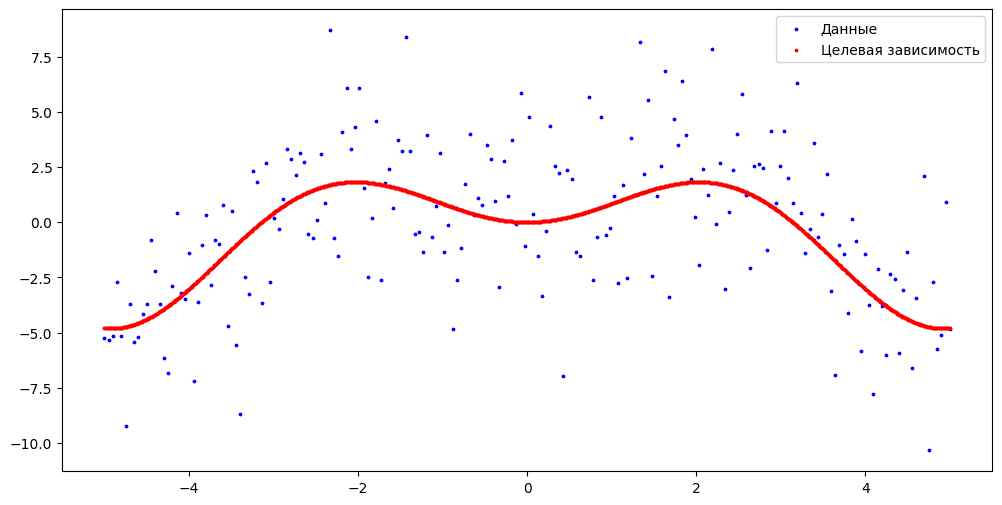

In [136]:
random.seed(42)
def function_random(x):
    return x*np.sin(x) + random.gauss(0, 3)

def target_function(x):
    return x*np.sin(x)

x = np.linspace(-5, 5, 200)
y = list(map(function_random, x))

x_target = np.linspace(-5, 5, 1000)
y_target = list(map(target_function, x_target))

plt.figure(figsize=(12,6))
plt.scatter(x, y, s=3, c='blue', label='Данные')
plt.scatter(x_target, y_target, c='red', label='Целевая зависимость', s=3)
plt.legend()
plt.show()

In [137]:
x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)
x_target, y_target = np.array(x_target).reshape(-1, 1), np.array(y_target).reshape(-1, 1)

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

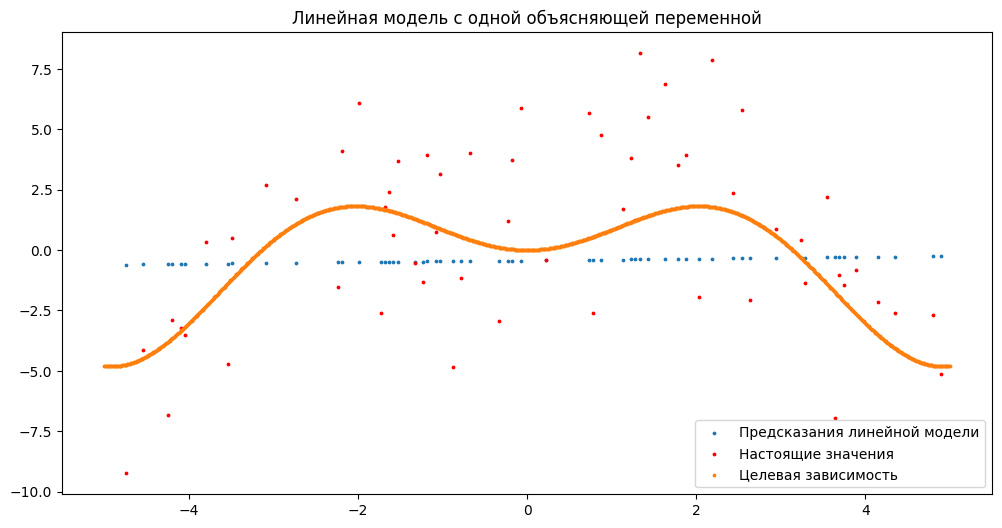

In [139]:
lm = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lm.fit(x_train, y_train)
pred = lm.predict(x_test)

# coefs = lm.coef_
# intercept = lm.intercept_
# def lm_func(x: np.array, params: np.array, intercept):
#     return np.dot(x, params) + intercept

# y_lm = lm_func(np.array(x_target), coefs, intercept)


plt.figure(figsize=(12,6))
plt.scatter(x_test, pred, s=3, label='Предсказания линейной модели')
plt.scatter(x_test, y_test, s=3, label='Настоящие значения', c='red')
plt.scatter(x_target, y_target, s=3, label='Целевая зависимость')
plt.title('Линейная модель с одной объясняющей переменной')
plt.legend()
plt.show()

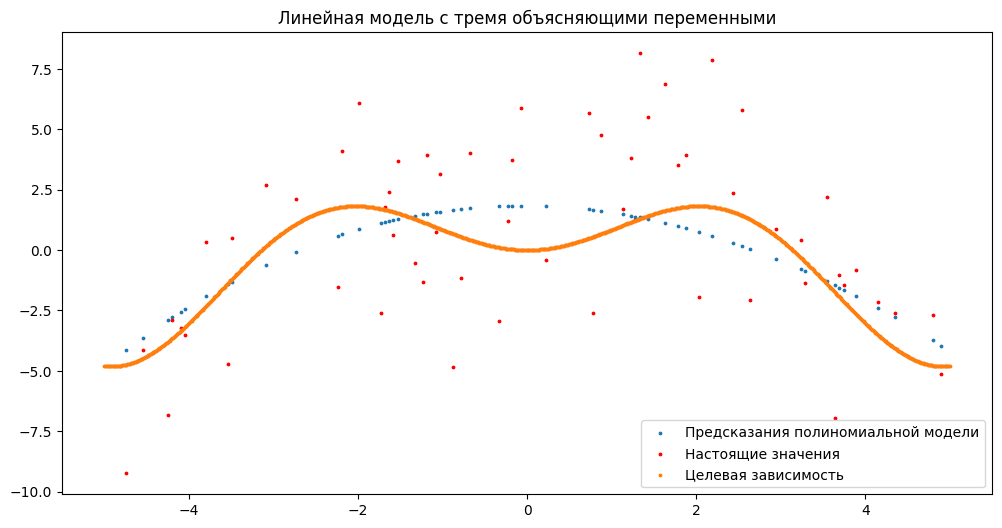

In [140]:
x_stacked = np.hstack((x, x**2, x**3))  # теперь у нас три объясняющие переменные: помимо x мы завезли еще квадрат и куб
x_train, x_test, y_train, y_test = train_test_split(x_stacked, y, test_size=0.3, random_state=42)

lm.fit(x_train, y_train)
pred = lm.predict(x_test)

plt.figure(figsize=(12,6))
plt.scatter(x_test[:, 0], pred, s=3, label='Предсказания полиномиальной модели')
plt.scatter(x_test[:, 0], y_test, s=3, label='Настоящие значения', c='red')
plt.scatter(x_target, y_target, s=3, label='Целевая зависимость')
plt.title('Линейная модель с тремя объясняющими переменными')
plt.legend()
plt.show()

In [141]:
from sklearn.tree import DecisionTreeRegressor

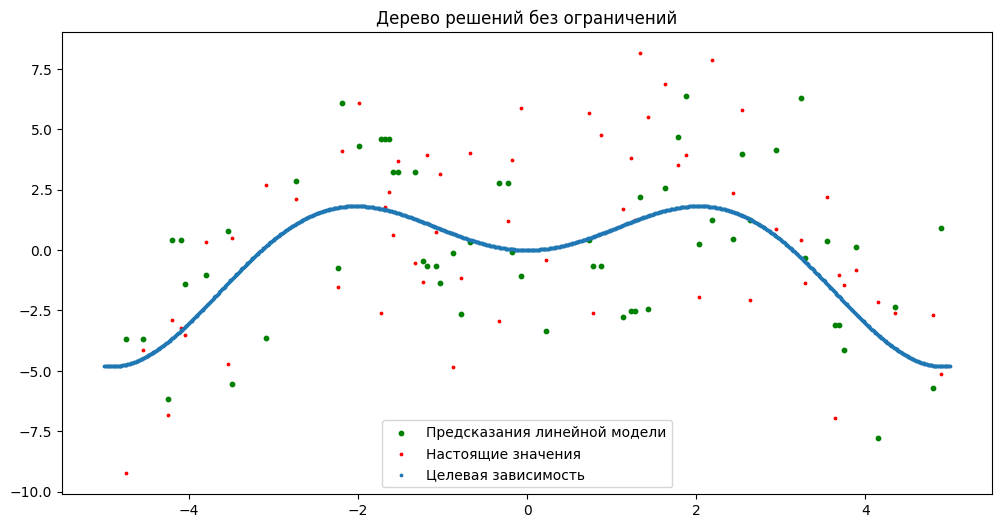

In [ ]:
dtr = DecisionTreeRegressor()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

dtr.fit(x_train, y_train)
pred = dtr.predict(x_test)

plt.figure(figsize=(12,6))
plt.scatter(x_test, pred, s=10, label='Предсказания модели', c='green')
plt.scatter(x_test, y_test, s=3, label='Настоящие значения', c='red')
plt.scatter(x_target, y_target, s=3, label='Целевая зависимость')
plt.title('Дерево решений без ограничений')
plt.legend()
plt.show()

Отчетливо заметно, что модель переобучилась под шум в данных. Попробуем упростить решающее дерево и посмотреть на предсказания.

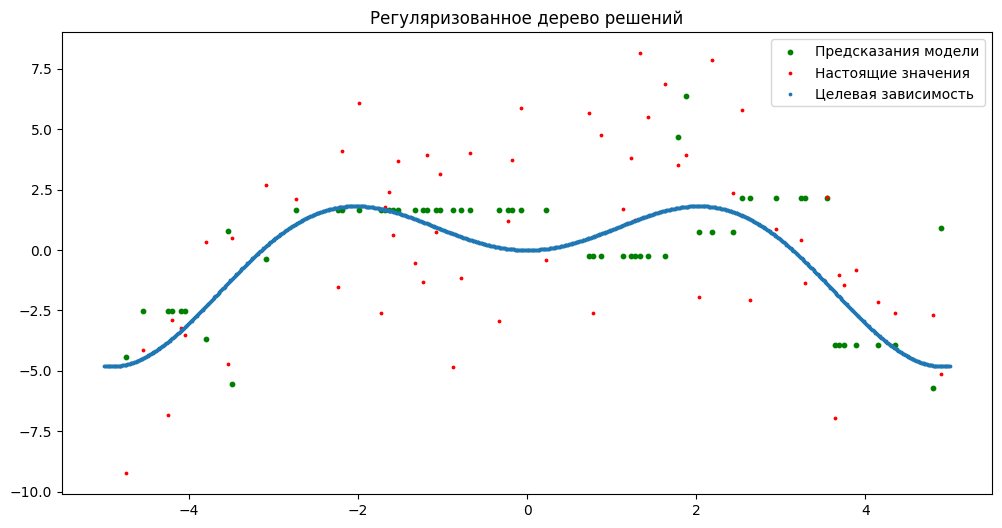

In [159]:
dtr_reg = DecisionTreeRegressor(max_depth=5)

dtr_reg.fit(x_train, y_train)
pred = dtr_reg.predict(x_test)

plt.figure(figsize=(12,6))
plt.scatter(x_test, pred, s=10, label='Предсказания модели', c='green')
plt.scatter(x_test, y_test, s=3, label='Настоящие значения', c='red')
plt.scatter(x_target, y_target, s=3, label='Целевая зависимость')
plt.title('Регуляризованное дерево решений')
plt.legend()
plt.show()

Визуально заметно, что, ограничив максимальную глубину дерева, мы добились более точного описания целевой зависимости. Тем не менее, можно улучшить эту модель, применив ансамбли. Мы воспользуемся бэггингом над решающими деревьями, а именно случайным лесом (бэггингом с методом случайных подпространств).

c:\Users\bas41\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


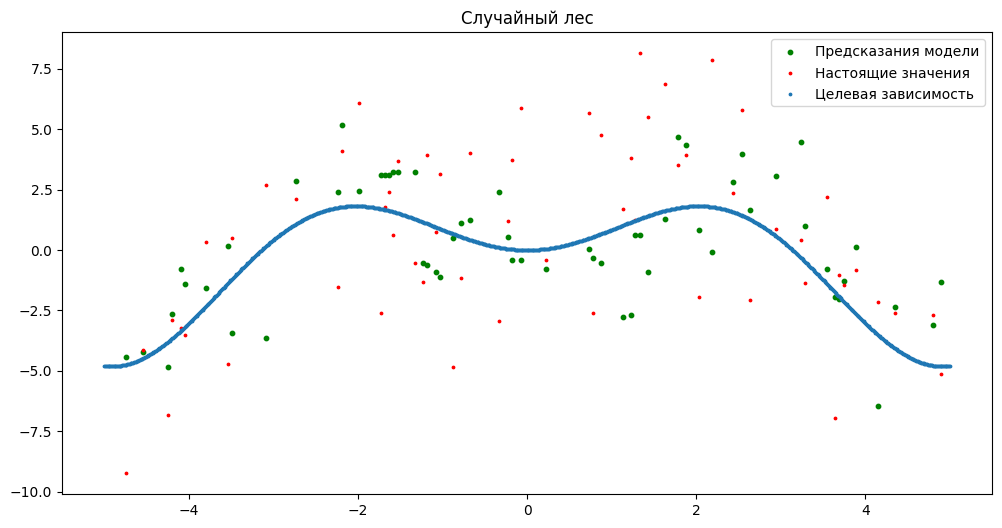

In [177]:
from sklearn.ensemble import BaggingRegressor

ens = BaggingRegressor(DecisionTreeRegressor(), 
                       n_estimators=3, 
                       random_state=42)
ens.fit(x_train, y_train)
pred = ens.predict(x_test)

plt.figure(figsize=(12,6))
plt.scatter(x_test, pred, s=10, label='Предсказания модели', c='green')
plt.scatter(x_test, y_test, s=3, label='Настоящие значения', c='red')
plt.scatter(x_target, y_target, s=3, label='Целевая зависимость')
plt.title('Случайный лес')
plt.legend()
plt.show()

Визуально можно отметить, что модель хорошо уловила зависимость в данных, однако чересчур подстроилась под обучающую выборку. Попробуем уменьшить дисперсию базовых моделей, регуляризовав деревья. Теперь в качестве метода регуляризации воспользуемся ограничением на минимальное улучшение информативности при делении вершины дерева.

c:\Users\bas41\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


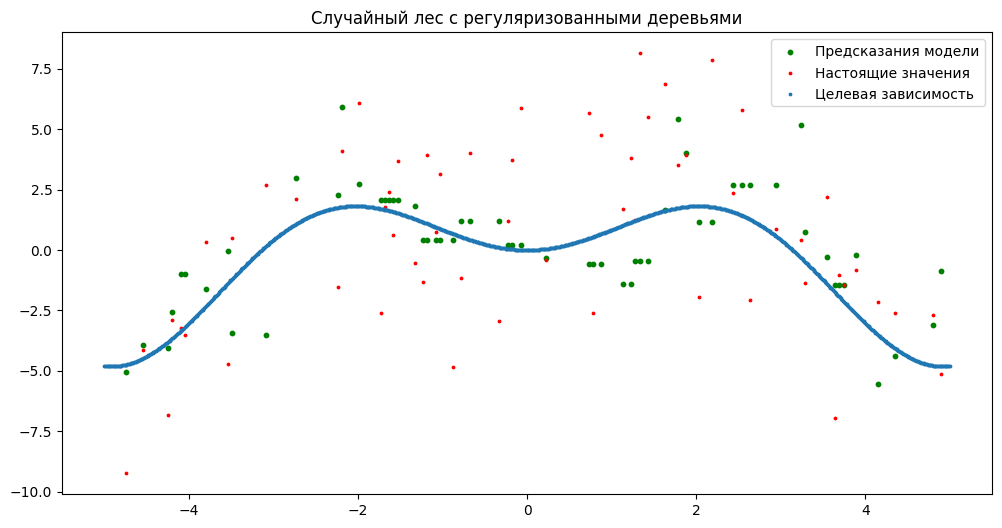

In [178]:
ens_reg = BaggingRegressor(DecisionTreeRegressor(min_impurity_decrease=0.04), 
                       n_estimators=3, 
                       random_state=42)
ens_reg.fit(x_train, y_train)
pred = ens_reg.predict(x_test)

plt.figure(figsize=(12,6))
plt.scatter(x_test, pred, s=10, label='Предсказания модели', c='green')
plt.scatter(x_test, y_test, s=3, label='Настоящие значения', c='red')
plt.scatter(x_target, y_target, s=3, label='Целевая зависимость')
plt.title('Случайный лес с регуляризованными деревьями')
plt.legend()
plt.show()